**Importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import r2_score
import os

**Building the Deep Learning model for small population**

In [ ]:
def process_strategy(file_path):
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Remove rows where the content matches the column names
    df = df[~df['name'].isin(df.columns)]
    # Remove duplicate rows
    df.drop_duplicates(inplace=True)
    #renaming the column name to simulation althought this is kind of pointless since we won't need the simulation column later on
    df.rename(columns={'name': 'simulation'}, inplace=True)
    df.rename(columns={'#nb_dead': 'nb_death'}, inplace=True)
    df['simulation'] = df['simulation'].apply(lambda x: x.split()[-1])

    #we wouldn't need the column simulation since we will get the average of all of them combined so let's just drop it
    df.drop(columns=['simulation'], inplace=True)
    #number of people is constant rendering it useless, so let's drop this too
    df.drop(columns=['nb_people'], inplace=True)

    # Convert columns to numeric (in case they contain non-numeric data)
    numeric_cols = ['cycle', 'nb_susceptible', 'nb_infected', 'nb_resistant', 'nb_death']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    # Check for NaN or non-numeric values
    if df.isnull().values.any():
        print("There are NaN or non-numeric values in the DataFrame.")
    else:
        # Group by the cycle column
        grouped = df.groupby('cycle')

        # Calculate the average of desired columns within each group
        averages = grouped.mean().round(2)
        print(averages)

    # Save the averages DataFrame to a CSV file
    averages.to_csv('averages.csv')

    print("Averages saved to 'averages.csv' file.")

    # Plotting the averages
    plt.figure(figsize=(10, 6))
    for col in averages.columns:
        plt.plot(averages.index, averages[col], marker='o', label=col)

    # Adding labels and title
    plt.xlabel('Cycle')
    plt.ylabel('Average Value')
    plt.title('Average Values Over Cycles')
    plt.legend()

    # Showing the plot
    plt.grid(True)
    plt.show()

    # Load the dataset
    df = pd.read_csv("averages.csv")

    # Splitting the dataset into train and test sets
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

    # Display the shapes of train and test sets
    print("Shape of train set:", train_df.shape)
    print("Shape of test set:", test_df.shape)

    # 1. Prepare the data
    X_train = train_df.drop(columns=['cycle', 'nb_death']).values
    y_train = train_df['nb_death'].values

    X_test = test_df.drop(columns=['cycle', 'nb_death']).values
    y_test = test_df['nb_death'].values

    # 2. Build the deep learning model
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.25),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer with single neuron for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error as loss function

    # 3. Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

    # 4. Evaluate the model
    loss = model.evaluate(X_test, y_test)
    print("Test Loss:", loss)

    # Plotting training history
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    r2 = r2_score(y_test, y_pred)
    print("Accuracy score:", r2)

    # Ploting the acctual vs predicted
    plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Number of Deaths')
    plt.ylabel('Predicted Number of Deaths')
    plt.title('Actual vs. Predicted Number of Deaths')
    plt.grid(True)
    plt.show()

**First Scenario**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       nb_susceptible  nb_infected  nb_resistant  nb_death
cycle                                                     
0             1000.00         5.00          0.00      0.00
1              999.82         5.18          0.00      0.00
2              999.55         5.27          0.18      0.00
3              999.18         5.55          0.27      0.00
4              998.82         5.91          0.27      0.00
...               ...          ...           ...       ...
496            193.64        85.82        685.18     40.36
497            192.09        85.36        687.18     40.36
498            190.73        85.36        688.55     40.36
499            189.73        85.55        689.36     40.36
500            189.00        85.27        690.36     40.36

[501 rows x 4 columns]
Averages saved to 'averages.csv' file.


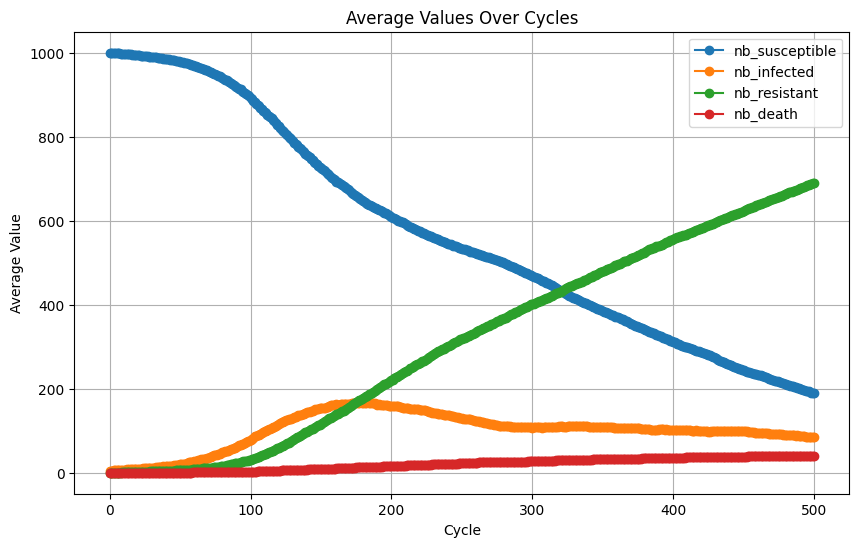

Shape of train set: (400, 5)
Shape of test set: (101, 5)
Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 8166.2603 - val_loss: 2991.4312
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 2812.3489 - val_loss: 557.6711
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 1936.1471 - val_loss: 297.0446
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 1483.0634 - val_loss: 163.3387
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 1186.9923 - val_loss: 164.4355
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 817.9194 - val_loss: 207.7978
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 747.7924 - val_loss: 106.9694
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 516.4587 - val_loss: 56.9339
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 443.4539 - val_loss: 56.4096
Epoch 10/50
10/10 [=

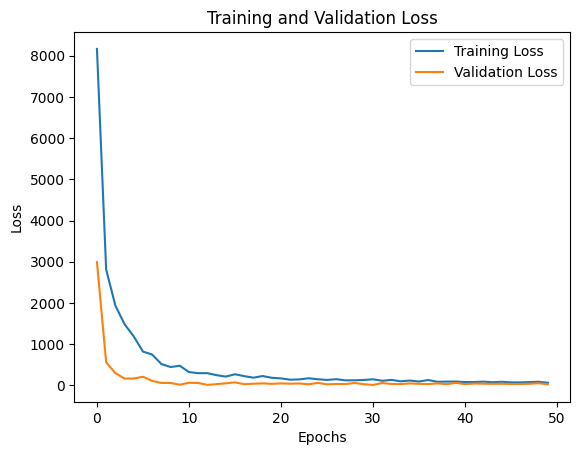

4/4 [==============================] - 0s 3ms/step
Accuracy score: 0.8936588599823648


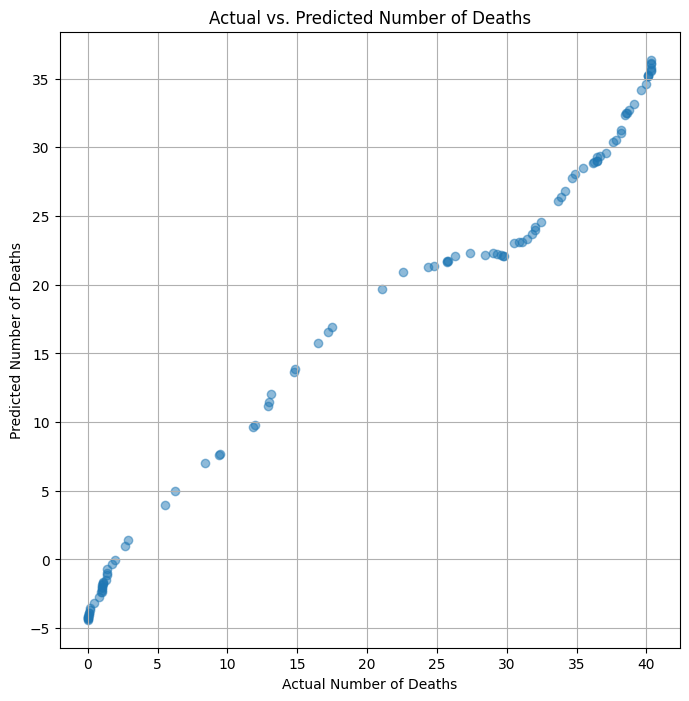

In [ ]:
import os
from google.colab import drive
# drive.mount('/content/drive')
# os.chdir("/content/drive/My Drive/AI_Project")

file_path = "file_result_strat_1_scenar_1.csv"
process_strategy(file_path)


**Second Scenario**

       nb_susceptible  nb_infected  nb_resistant  nb_death
cycle                                                     
0             1000.00         5.00          0.00      0.00
1              999.73         5.27          0.00      0.00
2              999.45         5.45          0.09      0.00
3              999.27         5.55          0.18      0.00
4              999.18         5.55          0.27      0.00
...               ...          ...           ...       ...
496            180.36        82.27        696.27     46.09
497            179.27        81.91        697.64     46.18
498            178.27        81.64        698.91     46.18
499            177.45        80.82        700.36     46.36
500            175.91        80.82        701.82     46.45

[501 rows x 4 columns]
Averages saved to 'averages.csv' file.


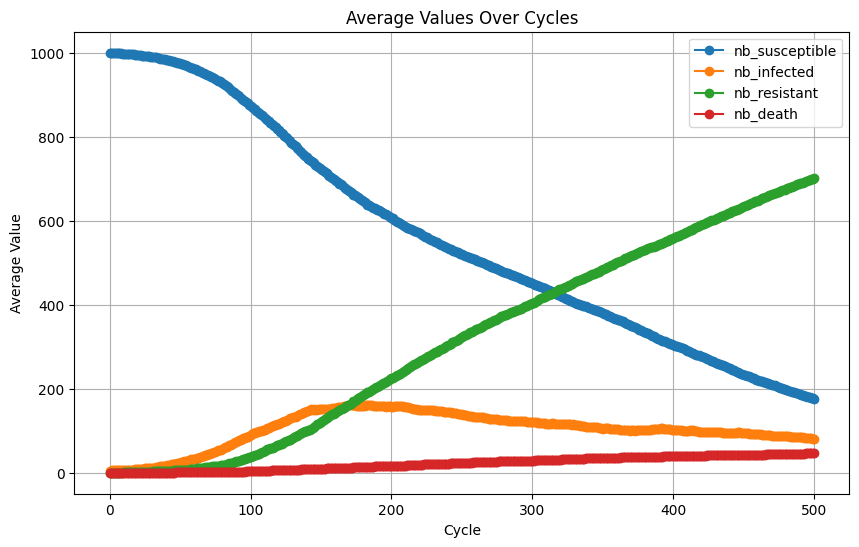

Shape of train set: (400, 5)
Shape of test set: (101, 5)
Epoch 1/50
10/10 [==============================] - 1s 20ms/step - loss: 6894.2046 - val_loss: 1956.5121
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 2324.6238 - val_loss: 588.7089
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 1189.1272 - val_loss: 123.1359
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 981.1548 - val_loss: 187.2630
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 973.1600 - val_loss: 63.9335
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 664.3953 - val_loss: 11.7387
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 660.6352 - val_loss: 36.0766
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 668.3441 - val_loss: 17.1770
Epoch 9/50
10/10 [==============================] - 0s 7ms/step - loss: 596.2831 - val_loss: 16.2566
Epoch 10/50
10/10 [======

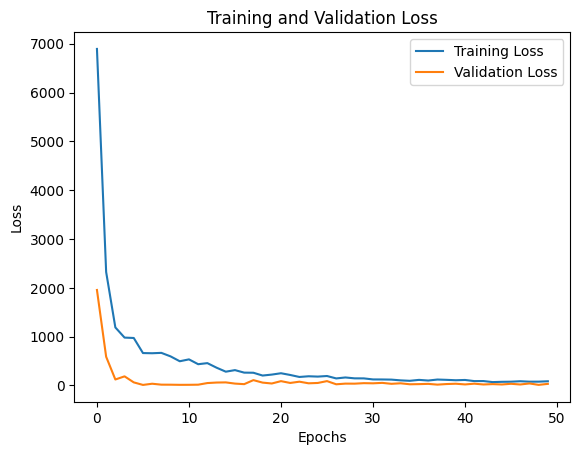

4/4 [==============================] - 0s 3ms/step
Accuracy score: 0.9009509626987423


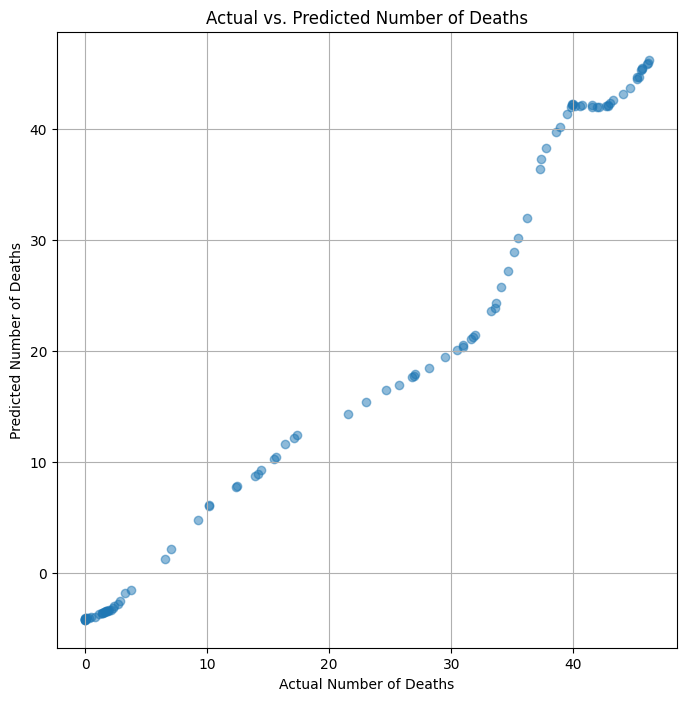

In [ ]:
file_path = "file_result_strat_1_scenar_2.csv"
process_strategy(file_path)

**Third Scenario**

       nb_susceptible  nb_infected  nb_resistant  nb_death
cycle                                                     
0             1000.00         5.00          0.00      0.00
1              999.64         5.27          0.09      0.00
2              999.18         5.73          0.09      0.00
3              998.91         5.91          0.18      0.00
4              998.55         6.27          0.18      0.00
...               ...          ...           ...       ...
496            373.18         5.55        590.36     35.91
497            372.82         5.36        590.91     35.91
498            372.00         5.18        591.91     35.91
499            371.36         5.00        592.73     35.91
500            370.18         5.09        593.73     36.00

[501 rows x 4 columns]
Averages saved to 'averages.csv' file.


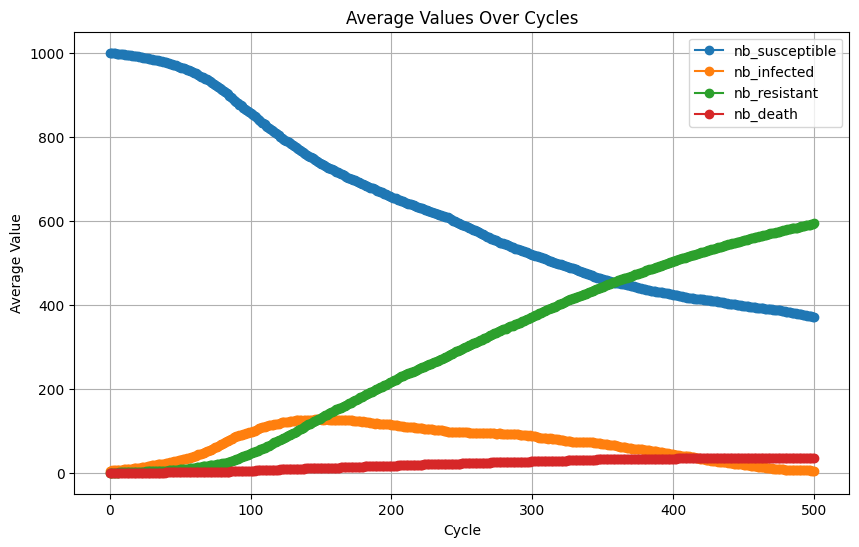

Shape of train set: (400, 5)
Shape of test set: (101, 5)
Epoch 1/50
10/10 [==============================] - 1s 32ms/step - loss: 13932.7988 - val_loss: 4025.9602
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 3818.1145 - val_loss: 1700.7867
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 2367.1274 - val_loss: 401.5892
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 1583.0503 - val_loss: 156.9714
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 1264.1354 - val_loss: 51.5847
Epoch 6/50
10/10 [==============================] - 0s 9ms/step - loss: 843.2061 - val_loss: 24.1127
Epoch 7/50
10/10 [==============================] - 0s 10ms/step - loss: 845.8177 - val_loss: 11.2014
Epoch 8/50
10/10 [==============================] - 0s 10ms/step - loss: 782.7592 - val_loss: 3.4642
Epoch 9/50
10/10 [==============================] - 0s 8ms/step - loss: 771.7279 - val_loss: 4.5654
Epoch 10/50
10/10 [==

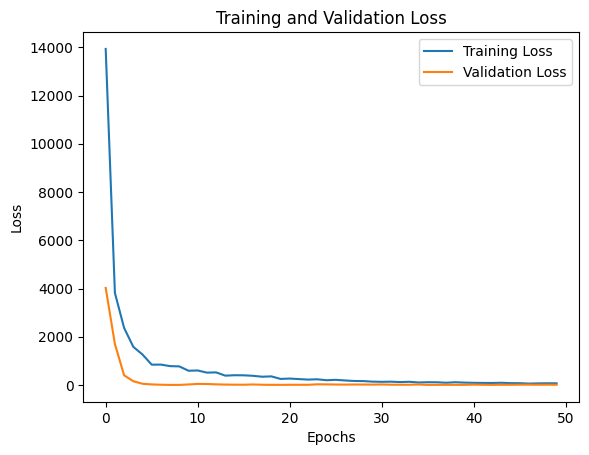

4/4 [==============================] - 0s 4ms/step
Accuracy score: 0.9537871392085377


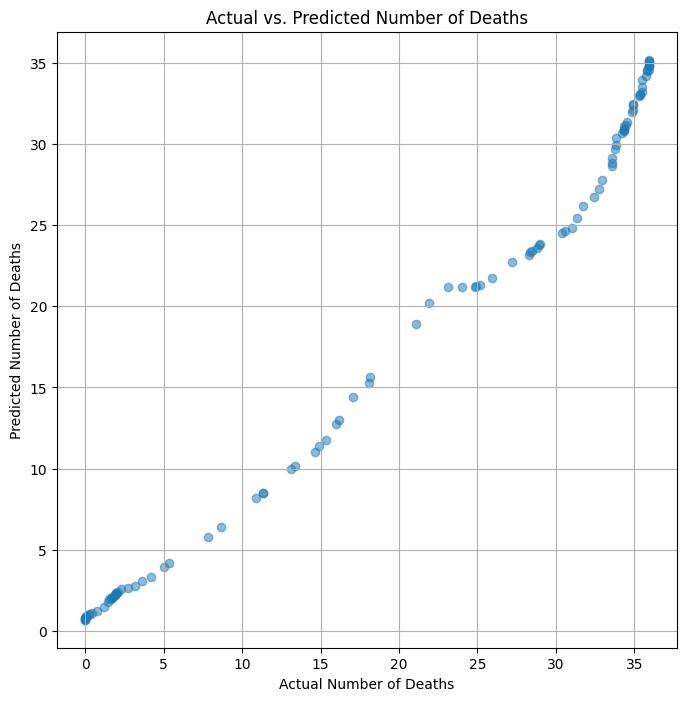

In [ ]:
file_path = "file_result_strat_2_scenar_1.csv"
process_strategy(file_path)

**Fourth Scenario**

       nb_susceptible  nb_infected  nb_resistant  nb_death
cycle                                                     
0             1000.00         5.00          0.00      0.00
1             1000.00         5.00          0.00      0.00
2              999.64         5.09          0.27      0.00
3              999.45         5.09          0.45      0.00
4              999.09         5.45          0.45      0.00
...               ...          ...           ...       ...
496            376.55        20.45        572.91     35.09
497            376.00        20.09        573.82     35.09
498            375.73        19.45        574.73     35.09
499            375.09        19.36        575.36     35.18
500            374.45        19.27        576.09     35.18

[501 rows x 4 columns]
Averages saved to 'averages.csv' file.


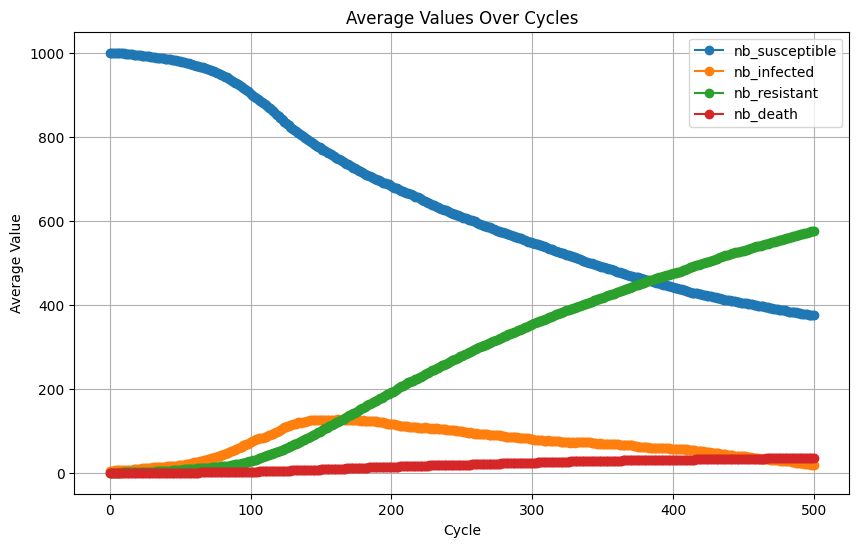

Shape of train set: (400, 5)
Shape of test set: (101, 5)
Epoch 1/50
10/10 [==============================] - 1s 18ms/step - loss: 5981.1675 - val_loss: 742.5269
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 3188.3032 - val_loss: 340.0982
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 2378.8220 - val_loss: 113.8669
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 1507.8562 - val_loss: 66.2553
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 1149.0278 - val_loss: 61.8213
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 1083.9534 - val_loss: 26.5988
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 780.5491 - val_loss: 27.5614
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 730.0529 - val_loss: 20.8992
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 673.9596 - val_loss: 23.7184
Epoch 10/50
10/10 [=====

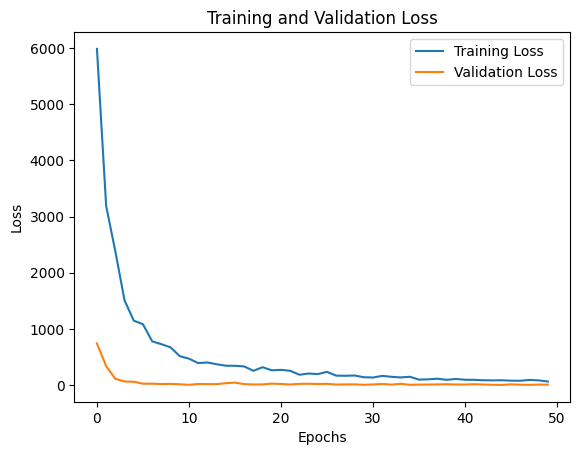

4/4 [==============================] - 0s 3ms/step
Accuracy score: 0.9469809395456376


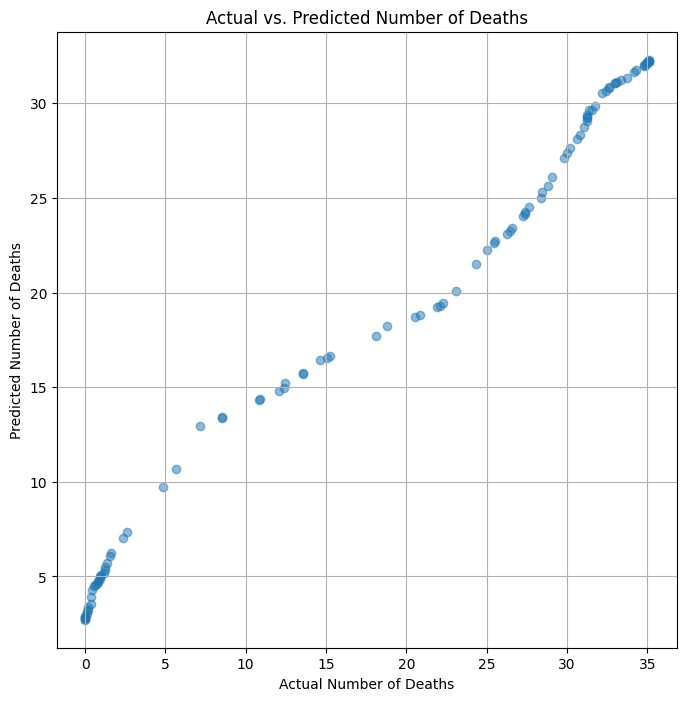

In [ ]:
file_path = "file_result_strat_2_scenar_2.csv"
process_strategy(file_path)

**Implementing the model with a large population**